In [1]:
from wordcloud import WordCloud

from scipy import integrate
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
#read file
tweet=pd.read_csv("cleaned_tweet_df.csv")
content=tweet['clean_text']

In [3]:
#join all tweet into a big chunk of string
s=''
for i in content:
    s+=i

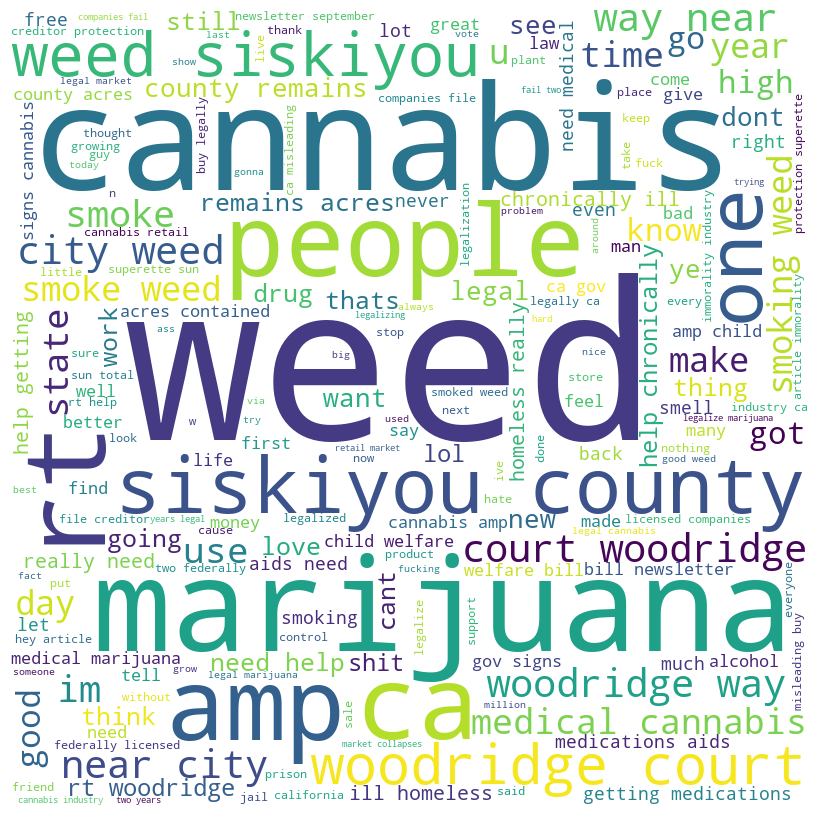

In [4]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 5).generate(s)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [5]:
vectorizer=CountVectorizer(stop_words='english',analyzer = 'word')
vv  =  vectorizer.fit_transform(content)   

In [6]:
def score_vibe(text):    
    score=[]
    sia = SentimentIntensityAnalyzer()
    for i in text:
        score.append(sia.polarity_scores(i))
    return score
score=score_vibe(content)
score_df = pd.DataFrame.from_records(score)
score_df

,neg,neu,pos,compound
0,0.563,0.392,0.045,-0.9531
1,0.048,0.578,0.374,0.9184
2,0.225,0.775,0.000,-0.4404
3,0.000,1.000,0.000,0.0000
4,0.381,0.500,0.119,-0.6369
...,...,...,...,...
2495,0.000,0.769,0.231,0.4019
2496,0.000,1.000,0.000,0.0000
2497,0.366,0.568,0.065,-0.8625
2498,0.000,1.000,0.000,0.0000


In [7]:
score_df.describe()

,neg,neu,pos,compound
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.098713,0.746492,0.154802,0.093621
std,0.143998,0.212583,0.176645,0.435726
min,0.000000,0.000000,0.000000,-0.974400
25%,0.000000,0.583000,0.000000,-0.090050
50%,0.000000,0.738000,0.110000,0.000000
75%,0.182000,1.000000,0.278000,0.440400
max,0.912000,1.000000,1.000000,0.976400


Text(0.5, 0, 'Score')

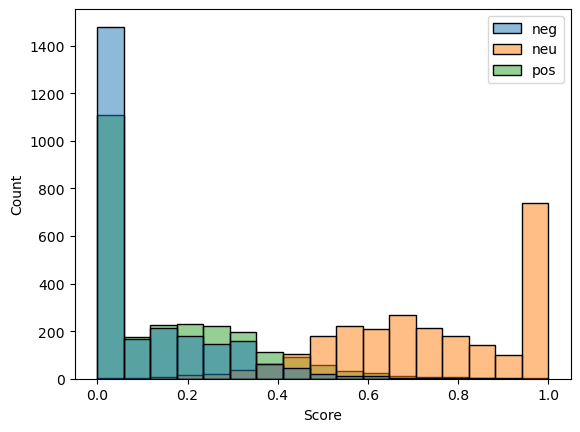

In [8]:
import seaborn as sns

p=sns.histplot(data=score_df[["neg",'neu','pos']])
p.set_xlabel("Score")

In [10]:
#label the dataset with tone
tweet['tone']=score_df['compound']

In [20]:
tweet.drop('Text',axis=1)
tweet.to_csv('clean_tweet_tone_df.csv')